In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)

from afrc import AnalyticalFRC
from afrc.polymer_models import nudep_saw, saw, wlc2
import protfasta
import metapredict as meta
from sparrow import Protein
from sparrow.data import amino_acids



meta NOT subset; don't know how to subset; dropped


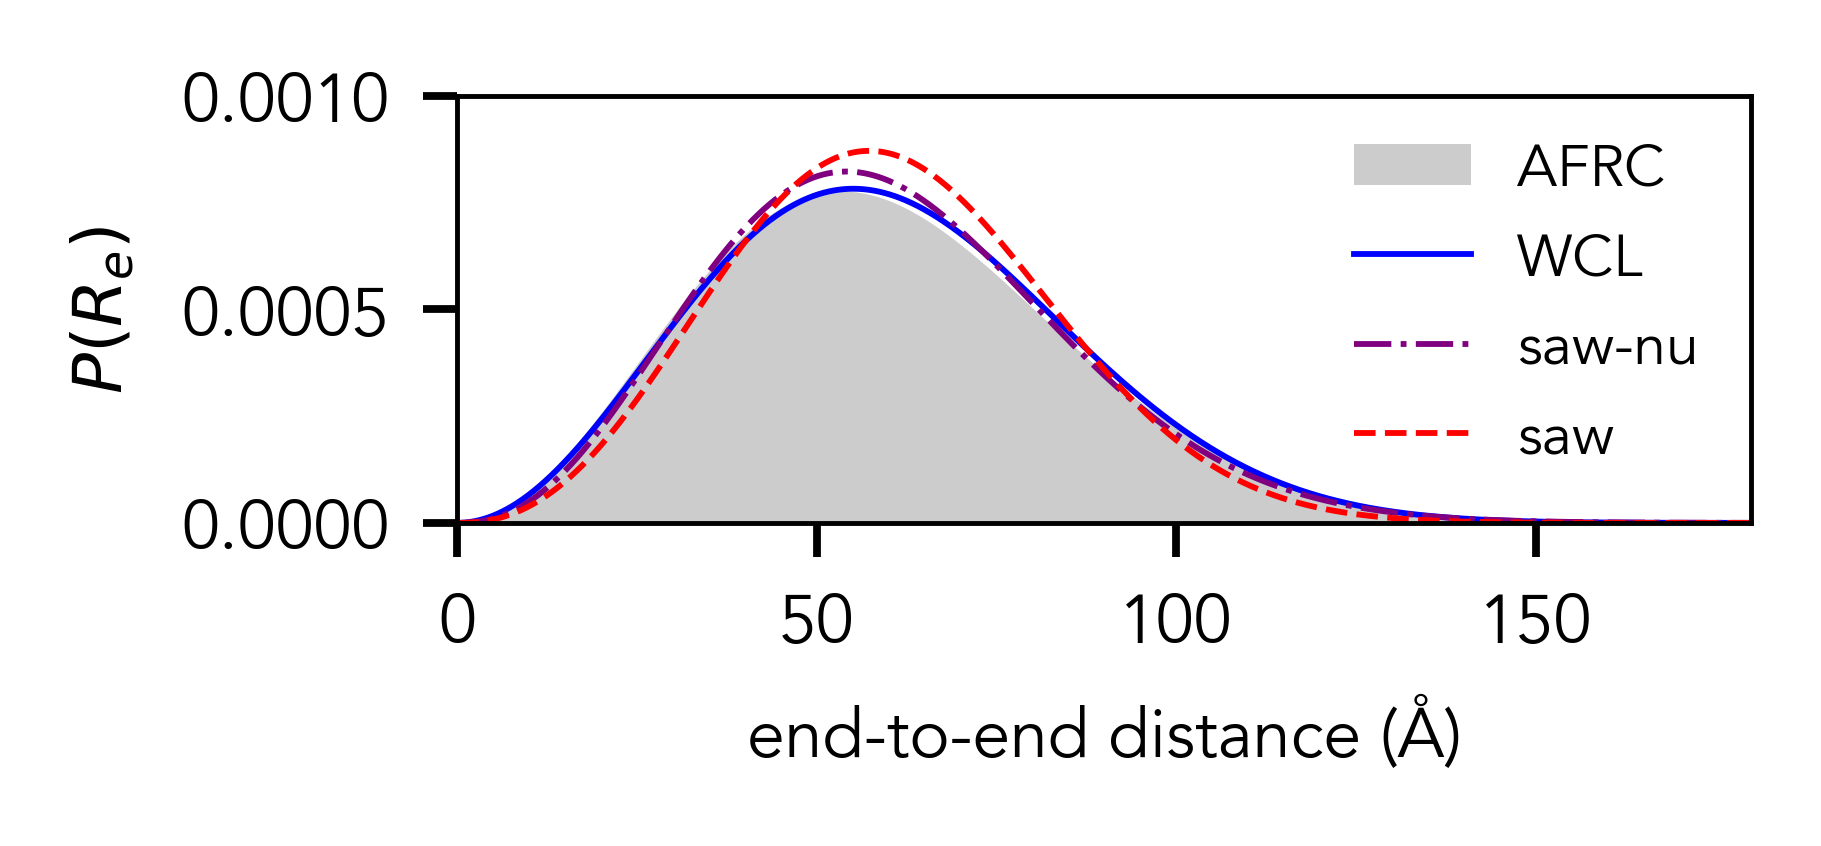

In [124]:
afrc_x = AnalyticalFRC('A'*100).get_end_to_end_distribution()


wlc2_x = wlc2.WormLikeChain2('A'*100, lp=5.7).get_end_to_end_distribution()
nudep_saw_x = nudep_saw.NuDepSAW('A'*100).get_end_to_end_distribution(nu=0.5, prefactor=5.8 )
saw_x = saw.SAW('A'*100).get_end_to_end_distribution(prefactor=4.1 )

figure(None, (2.7,1.3), dpi=350)

ax = plt.gca()

#plt.plot(afrc_x[0], afrc_x[1],'-b', linewidth=0.8)


ax.fill_between(afrc_x[0], afrc_x[1], color='black', alpha=0.2, linewidth=0, label='AFRC')

#plt.plot(wlc2_x[0][::90], wlc2_x[1][::90],'o',  color='purple', linewidth=0.6, alpha=0.5, mew=0, ms=3)
plt.plot(wlc2_x[0], wlc2_x[1],'-b', linewidth=0.6, label='WCL')



#plt.plot(nudep_saw_x[0][::90], nudep_saw_x[1][::90],'^',  color='k', linewidth=0.6, alpha=.4, mew=0, ms=4)
plt.plot(nudep_saw_x[0], nudep_saw_x[1],'-.',  color='purple', linewidth=0.6, label='saw-nu')

plt.plot(saw_x[0], saw_x[1],'--',  color='red', linewidth=0.6, label='saw')


plt.tight_layout()
plt.xlim([0,180])
plt.ylim([0,0.001])
plt.legend(frameon=False, fontsize=6)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('end-to-end distance (Å)', fontsize=7)
plt.ylabel(r'$P(R_e)$', fontsize=7)
plt.tight_layout()
plt.savefig('wlc_vs_nudep_vs_afrc.pdf')



meta NOT subset; don't know how to subset; dropped


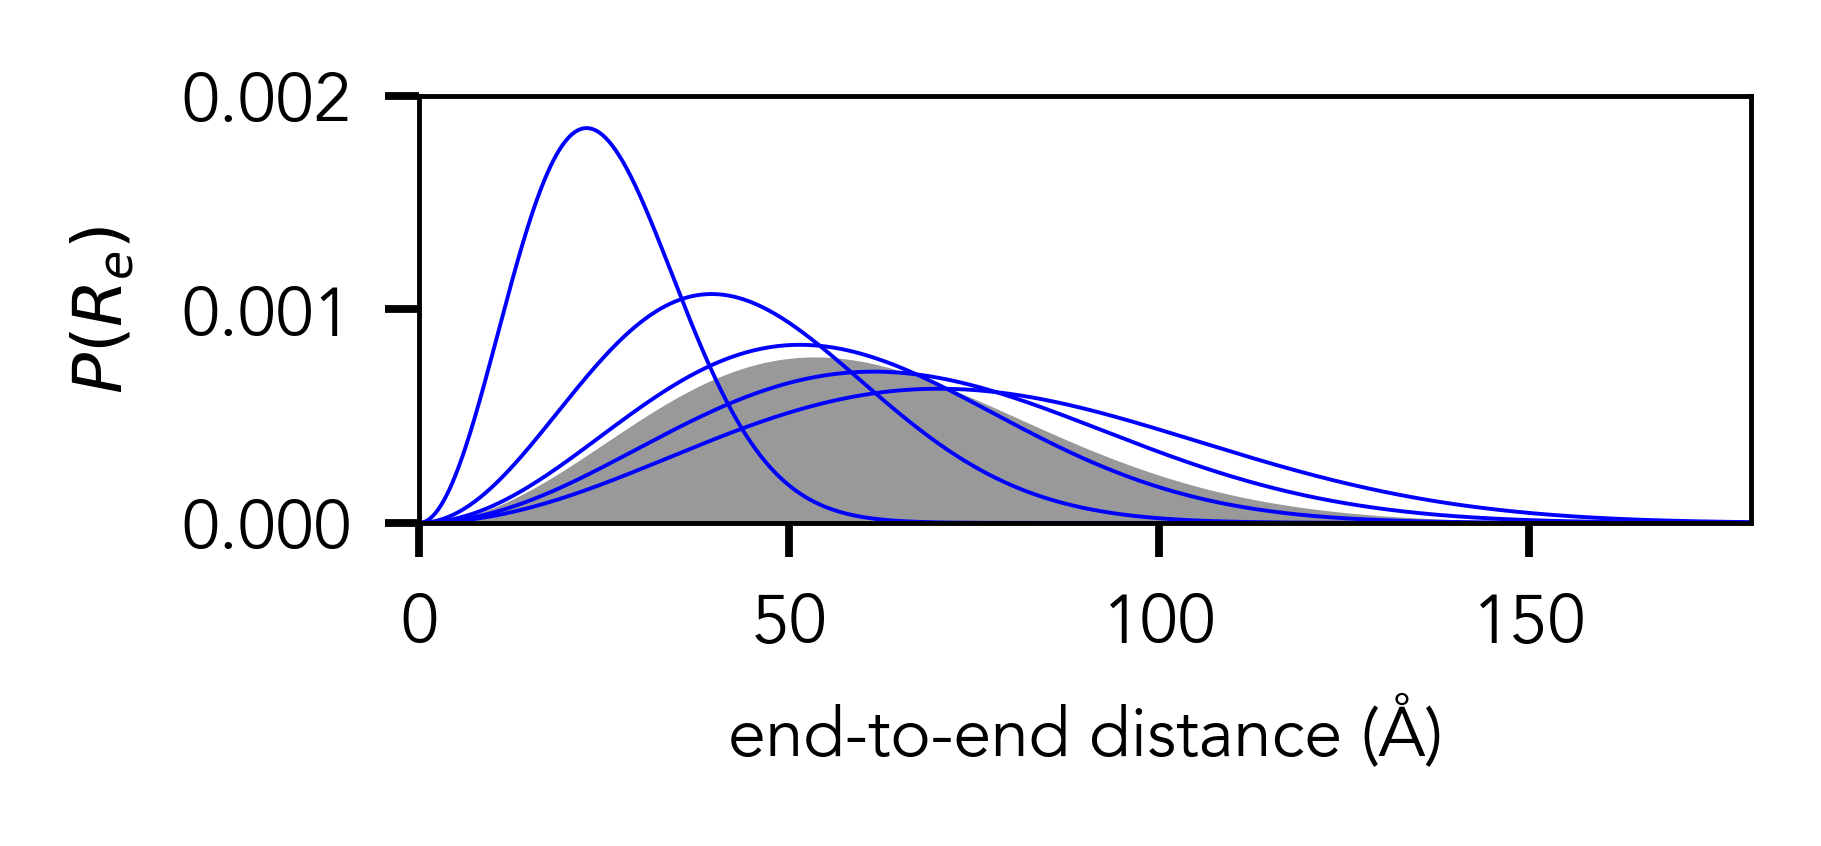

In [125]:
afrc_x = AnalyticalFRC('A'*100).get_end_to_end_distribution()
saw_x = saw.SAW('A'*100).get_end_to_end_distribution(prefactor=4.1 )

figure(None, (2.7,1.3), dpi=350)

ax = plt.gca()

#plt.plot(afrc_x[0], afrc_x[1],'-b', linewidth=0.8)


ax.fill_between(afrc_x[0], afrc_x[1], color='black', alpha=0.4, linewidth=0, label='AFRC')

for lp in np.arange(1, 10, 2):
    wlc2_x = wlc2.WormLikeChain2('A'*100, lp=lp).get_end_to_end_distribution()


    plt.plot(wlc2_x[0], wlc2_x[1],'-b', linewidth=0.4, label='WCL')


#plt.plot(saw_x[0], saw_x[1],'--',  color='green', linewidth=0.6, label='saw')


plt.tight_layout()
plt.xlim([0,180])
plt.ylim([0,0.002])
#plt.legend(frameon=False, fontsize=6)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('end-to-end distance (Å)', fo11ntsize=7)
plt.ylabel(r'$P(R_e)$', fontsize=7)
plt.tight_layout()
plt.savefig('wlc_vs_afrc.pdf')

